In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(low = -90.000, high = 90.000, size=1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
import requests
# Import the API key.
from config import weather_api_key
requests.__version__

'2.24.0'

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6f69822185a74de01c8ce51262da1787


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dianopolis
City not found. Skipping...
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | floresta
Processing Record 4 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | panaba
Processing Record 8 of Set 1 | sao miguel do araguaia
Processing Record 9 of Set 1 | carutapera
Processing Record 10 of Set 1 | nadym
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | kailua
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | rabo de peixe
Processing Record 15 of Set 1 | ikalamavony
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | tongliao
Processing Record 20 of Set 1 | bambous virieux
Processing Record 

Processing Record 33 of Set 4 | maple creek
Processing Record 34 of Set 4 | chokurdakh
Processing Record 35 of Set 4 | mareeba
Processing Record 36 of Set 4 | shelburne
Processing Record 37 of Set 4 | pevek
Processing Record 38 of Set 4 | samusu
City not found. Skipping...
Processing Record 39 of Set 4 | gelgaudiskis
Processing Record 40 of Set 4 | port hardy
Processing Record 41 of Set 4 | iwanai
Processing Record 42 of Set 4 | dikson
Processing Record 43 of Set 4 | barrow
Processing Record 44 of Set 4 | qaanaaq
Processing Record 45 of Set 4 | kerema
Processing Record 46 of Set 4 | yarim
Processing Record 47 of Set 4 | sakakah
Processing Record 48 of Set 4 | saint anthony
Processing Record 49 of Set 4 | bawku
Processing Record 50 of Set 4 | maholi
Processing Record 1 of Set 5 | kahului
Processing Record 2 of Set 5 | balykshi
Processing Record 3 of Set 5 | tobol
Processing Record 4 of Set 5 | puksoozero
Processing Record 5 of Set 5 | nanning
Processing Record 6 of Set 5 | barwadih
Proc

Processing Record 18 of Set 8 | esna
Processing Record 19 of Set 8 | tucupita
Processing Record 20 of Set 8 | novobiryusinskiy
Processing Record 21 of Set 8 | pochutla
Processing Record 22 of Set 8 | rozkishne
Processing Record 23 of Set 8 | belaya gora
Processing Record 24 of Set 8 | luau
Processing Record 25 of Set 8 | alexandria
Processing Record 26 of Set 8 | banikoara
Processing Record 27 of Set 8 | high level
Processing Record 28 of Set 8 | keuruu
Processing Record 29 of Set 8 | hasaki
Processing Record 30 of Set 8 | brigantine
Processing Record 31 of Set 8 | bezhetsk
Processing Record 32 of Set 8 | maarianhamina
Processing Record 33 of Set 8 | lorengau
Processing Record 34 of Set 8 | kilindoni
Processing Record 35 of Set 8 | grand-lahou
Processing Record 36 of Set 8 | elko
Processing Record 37 of Set 8 | ostersund
Processing Record 38 of Set 8 | torbay
Processing Record 39 of Set 8 | tezu
Processing Record 40 of Set 8 | lasa
Processing Record 41 of Set 8 | tateyama
Processing Re

Processing Record 2 of Set 12 | sept-iles
Processing Record 3 of Set 12 | moerai
Processing Record 4 of Set 12 | ambunti
Processing Record 5 of Set 12 | slave lake
Processing Record 6 of Set 12 | faya
Processing Record 7 of Set 12 | plouzane
Processing Record 8 of Set 12 | ambulu
Processing Record 9 of Set 12 | tabuk
Processing Record 10 of Set 12 | corinto
Processing Record 11 of Set 12 | labytnangi
Processing Record 12 of Set 12 | okhotsk
Processing Record 13 of Set 12 | karaul
City not found. Skipping...
Processing Record 14 of Set 12 | collierville
Processing Record 15 of Set 12 | viligili
City not found. Skipping...
Processing Record 16 of Set 12 | ibicarai
Processing Record 17 of Set 12 | deep river
Processing Record 18 of Set 12 | garden city
Processing Record 19 of Set 12 | goderich
Processing Record 20 of Set 12 | conceicao do araguaia
Processing Record 21 of Set 12 | dibaya
City not found. Skipping...
Processing Record 22 of Set 12 | vestmannaeyjar
Processing Record 23 of Set

In [11]:
len(city_data)

555

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,33.01,76,100,4.09,US,2021-01-20 01:14:13
1,Floresta,-8.6011,-38.5686,78.98,57,95,16.11,BR,2021-01-20 01:15:44
2,Petropavlovsk-Kamchatskiy,53.0452,158.6483,21.20,53,40,13.42,RU,2021-01-20 01:15:45
3,Busselton,-33.6500,115.3333,75.00,79,0,5.99,AU,2021-01-20 01:15:45
4,Nikolskoye,59.7035,30.7861,23.00,86,75,4.47,RU,2021-01-20 01:15:45
5,Panaba,21.2833,-88.2667,70.45,86,5,11.14,MX,2021-01-20 01:15:45
6,Sao Miguel Do Araguaia,-13.2750,-50.1628,73.51,86,100,2.98,BR,2021-01-20 01:14:52
7,Carutapera,-1.1950,-46.0200,77.13,85,100,7.47,BR,2021-01-20 01:15:46
8,Nadym,65.5333,72.5167,-28.25,85,37,2.86,RU,2021-01-20 01:13:11
9,Upernavik,72.7868,-56.1549,24.06,80,100,5.73,GL,2021-01-20 01:15:46


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [17]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-01-20 01:14:13,42.6001,-73.9662,33.01,76,100,4.09
1,Floresta,BR,2021-01-20 01:15:44,-8.6011,-38.5686,78.98,57,95,16.11
2,Petropavlovsk-Kamchatskiy,RU,2021-01-20 01:15:45,53.0452,158.6483,21.20,53,40,13.42
3,Busselton,AU,2021-01-20 01:15:45,-33.6500,115.3333,75.00,79,0,5.99
4,Nikolskoye,RU,2021-01-20 01:15:45,59.7035,30.7861,23.00,86,75,4.47


In [20]:
# Create the output file (CSV).
output_data_file = "Weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

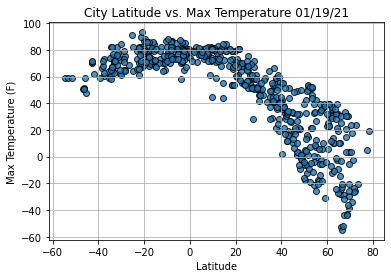

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

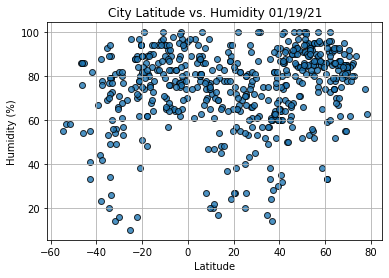

In [26]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

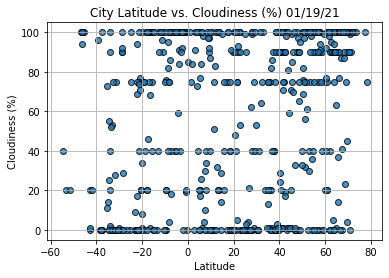

In [27]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

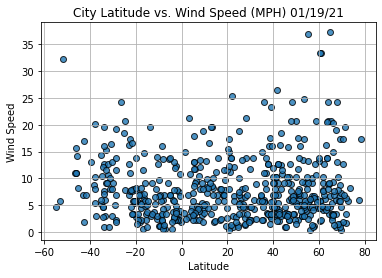

In [28]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (MPH) "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()